In [34]:
import pandas as pd
path = "D:/TON IOT/Processed_datasets/Processed_datasets/Processed_IoT_dataset/IoT_Modbus.csv"
mBusData = pd.read_csv(path)
print(mBusData.shape)
mBusData.head()

(287194, 8)


,date,time,FC1_Read_Input_Register,FC2_Read_Discrete_Value,FC3_Read_Holding_Register,FC4_Read_Coil,label,type
0,31-Mar-19,12:36:55,53287,1463,33518,23014,0,normal
1,31-Mar-19,12:36:58,41029,55891,26004,50645,0,normal
2,31-Mar-19,12:36:58,41029,55891,26004,50645,0,normal
3,31-Mar-19,12:37:00,64661,40232,33460,44046,0,normal
4,31-Mar-19,12:37:01,64661,40232,33460,44046,0,normal


In [35]:
mBusData.drop('type', axis = 1, inplace=True)
mBusData.drop(mBusData.iloc[:, 0:2], axis = 1, inplace=True)
mBusData.head()

,FC1_Read_Input_Register,FC2_Read_Discrete_Value,FC3_Read_Holding_Register,FC4_Read_Coil,label
0,53287,1463,33518,23014,0
1,41029,55891,26004,50645,0
2,41029,55891,26004,50645,0
3,64661,40232,33460,44046,0
4,64661,40232,33460,44046,0


col:  FC1_Read_Input_Register


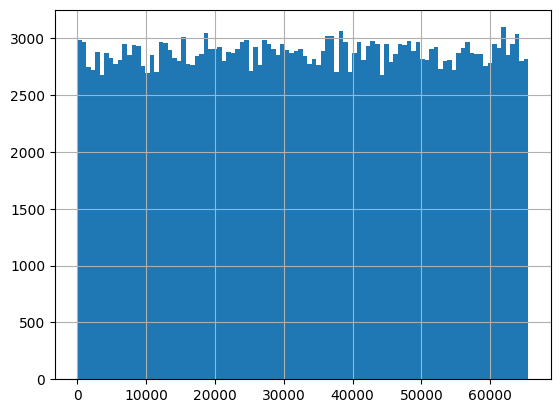

col:  FC2_Read_Discrete_Value


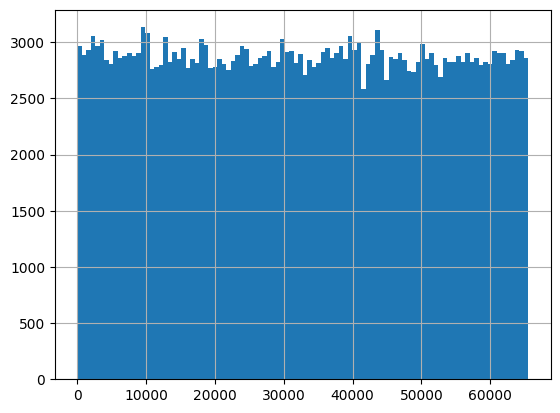

col:  FC3_Read_Holding_Register


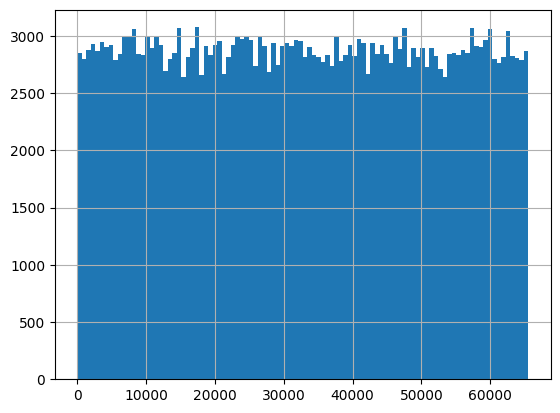

col:  FC4_Read_Coil


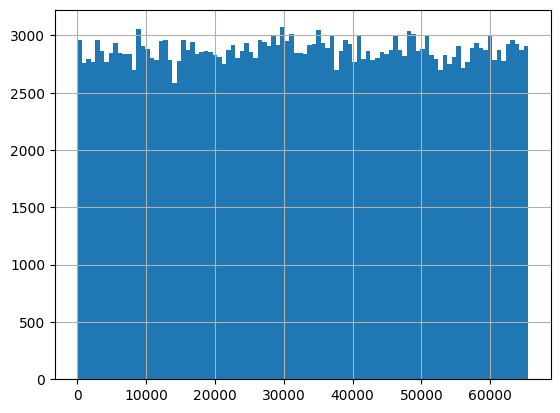

col:  label


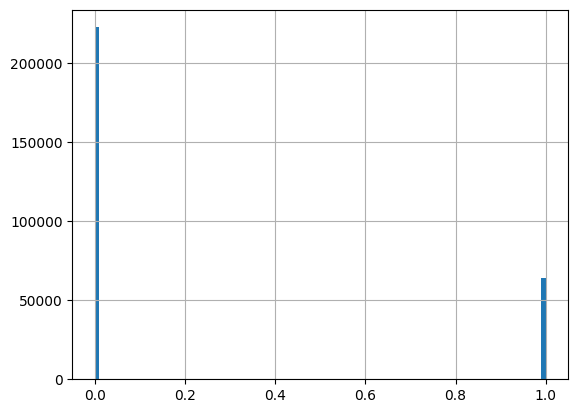

In [36]:
import matplotlib.pyplot as plt
columns = mBusData.columns
for col in columns:
    print("col: ", col)
    mBusData[col].hist(bins = 100)
    plt.show()

In [37]:
x = mBusData.drop('label', axis = 1)
y = mBusData['label']
print(y.value_counts())

0    222855
1     64339
Name: label, dtype: int64


<AxesSubplot: >

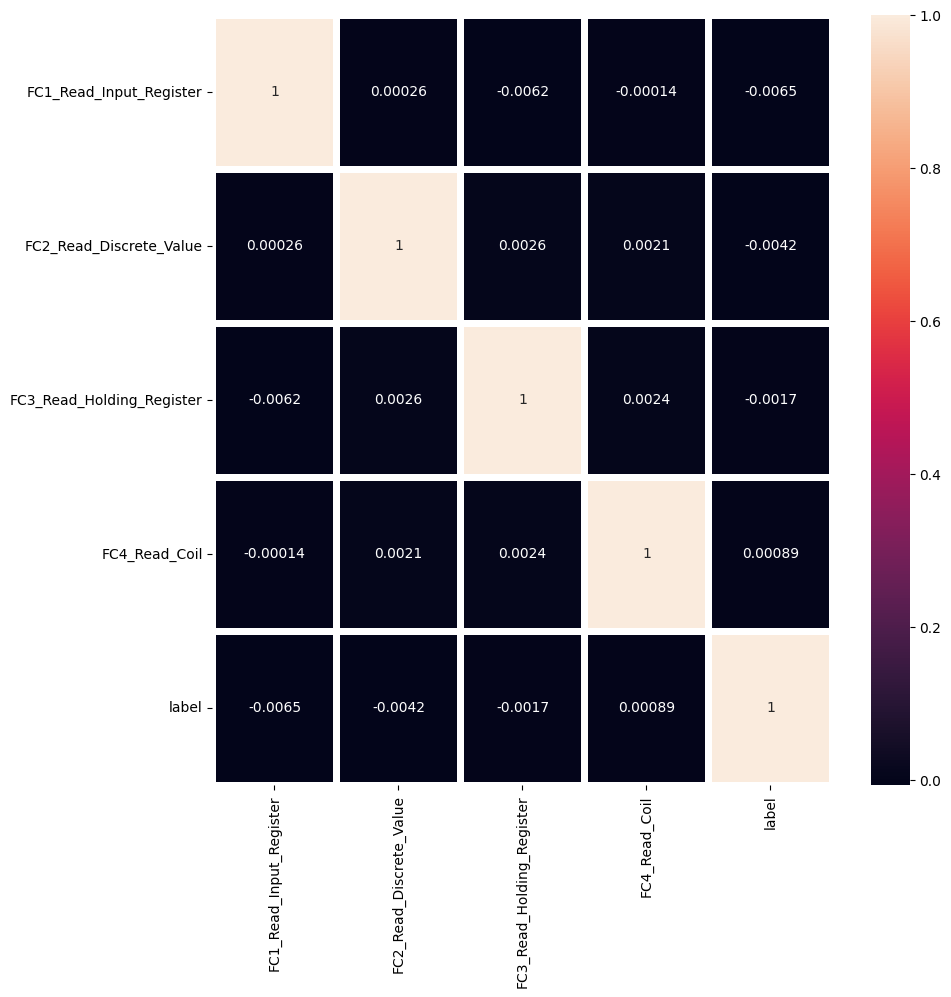

In [38]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(mBusData.corr(),annot=True, linewidth = 5, ax=ax)

In [39]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=8, shuffle = True, random_state=3)

In [40]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, roc_auc_score

def get_accuracy_score(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    y_pred= model.predict(x_test)
    modelAccuracyTest = accuracy_score(y_pred,y_test)
    return modelAccuracyTest

def get_f1_score(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    y_pred= model.predict(x_test)
    modelF1Test = f1_score(y_pred,y_test)
    return modelF1Test

def get_auc_roc(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    y_pred= model.predict(x_test)
    modelAucRocTest = roc_auc_score(y_pred,y_test)
    return modelAucRocTest

In [90]:
from sklearn.tree import DecisionTreeClassifier
from statistics import mean
Dtree_accuracy_scores = []
Dtree_f1_scores = []
Dtree_auc_roc_scores = []

for train_index, test_index in skf.split(x, y):
    x_train, x_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    Dtree_accuracy_scores.append(get_accuracy_score(DecisionTreeClassifier(), x_train, x_test, y_train, y_test))
    Dtree_f1_scores.append(get_f1_score(DecisionTreeClassifier(), x_train, x_test, y_train, y_test))
    Dtree_auc_roc_scores.append(get_auc_roc(DecisionTreeClassifier(), x_train, x_test, y_train, y_test))

mean_Dtree_accuracy_score = round(mean(Dtree_accuracy_scores)*100, 2)
mean_Dtree_f1_score = round(mean(Dtree_f1_scores)*100, 2)
mean_Dtree_auc_roc_score = round(mean(Dtree_auc_roc_scores)*100, 2)

print('Dtree Accuracy Score:',mean_Dtree_accuracy_score)
print('Dtree F1 Score:', mean_Dtree_f1_score)
print('Dtree AUC ROC Score:', mean_Dtree_auc_roc_score)

Dtree Accuracy Score: 95.81
Dtree F1 Score: 90.79
Dtree AUC ROC Score: 93.75


# Oversampling

In [42]:
from imblearn.over_sampling import SMOTE
import numpy as np
#Seeing the value count before oversampling
unique, count = np.unique(y_train, return_counts = True)
y_train_dict_value_count = {k:v for (k,v) in zip(unique, count)}
print("Before oversampling",y_train_dict_value_count)

sm = SMOTE(random_state=12)
x_train_sm, y_train_sm = sm.fit_sample(x_train, y_train)

# Seeing the value count after oversampling
unique, count = np.unique(y_train_sm, return_counts = True)
y_train_smote_value_count = {k:v for (k,v) in zip(unique, count)}
print("After oversampling",y_train_smote_value_count)

Before oversampling {0: 194999, 1: 56296}
After oversampling {0: 194999, 1: 194999}


In [91]:
from sklearn.tree import DecisionTreeClassifier
from statistics import mean
ovr_Dtree_accuracy_scores = []
ovr_Dtree_f1_scores = []
ovr_Dtree_auc_roc_scores = []

for train_index, test_index in skf.split(x_train_sm, y_train_sm):
    x_train, x_test, y_train, y_test = x_train_sm.iloc[train_index], x_train_sm.iloc[test_index], y_train_sm.iloc[train_index], y_train_sm.iloc[test_index]
    ovr_Dtree_accuracy_scores.append(get_accuracy_score(DecisionTreeClassifier(), x_train, x_test, y_train, y_test))
    ovr_Dtree_f1_scores.append(get_f1_score(DecisionTreeClassifier(), x_train, x_test, y_train, y_test))
    ovr_Dtree_auc_roc_scores.append(get_auc_roc(DecisionTreeClassifier(), x_train, x_test, y_train, y_test))

mean_ovr_Dtree_accuracy_score = round(mean(ovr_Dtree_accuracy_scores)*100, 2)
mean_ovr_Dtree_f1_score = round(mean(ovr_Dtree_f1_scores)*100, 2)
mean_ovr_Dtree_auc_roc_score = round(mean(ovr_Dtree_auc_roc_scores)*100, 2)

print('Dtree Accuracy Score after Oversampling:',mean_ovr_Dtree_accuracy_score)
print('Dtree F1 Score after Oversampling:', mean_ovr_Dtree_f1_score)
print('Dtree AUC ROC Score Oversampling:', mean_ovr_Dtree_auc_roc_score)

Dtree Accuracy Score after Oversampling: 92.85
Dtree F1 Score after Oversampling: 92.75
Dtree AUC ROC Score Oversampling: 92.88


# ^Much better overall score when oversampled compared to undersampled and no sampling

# Result when we use undersampling on the data

In [92]:
# saving the name of the target variable
target = 'label'

In [93]:
import numpy as np
minority_class_len = len(mBusData[mBusData[target] == 1])
majority_class_indices = mBusData[mBusData[target] == 0].index

random_majority_indices = np.random.choice(majority_class_indices, minority_class_len, replace=False)


In [94]:
minority_class_indices = mBusData[mBusData[target] == 1].index

In [95]:
under_sample_indices = np.concatenate([minority_class_indices, random_majority_indices])

In [96]:
under_sample = mBusData.loc[under_sample_indices]

<AxesSubplot: xlabel='label', ylabel='count'>

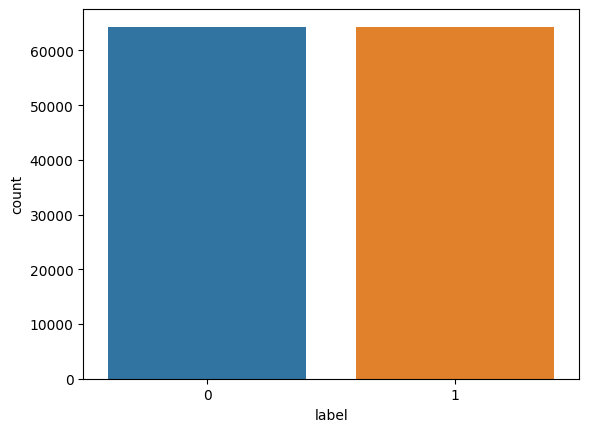

In [97]:
import seaborn as sns
sns.countplot(x = target, data = under_sample)

In [98]:
und_x = under_sample.loc[:, mBusData.columns !=target]
und_y = under_sample.loc[:, mBusData.columns == target]

from sklearn.tree import DecisionTreeClassifier
from statistics import mean
und_Dtree_accuracy_scores = []
und_Dtree_f1_scores = []
und_Dtree_auc_roc_scores = []

for train_index, test_index in skf.split(und_x, und_y):
    x_train, x_test, y_train, y_test = und_x.iloc[train_index], und_x.iloc[test_index], und_y.iloc[train_index], und_y.iloc[test_index]
    und_Dtree_accuracy_scores.append(get_accuracy_score(DecisionTreeClassifier(), x_train, x_test, y_train, y_test))
    und_Dtree_f1_scores.append(get_f1_score(DecisionTreeClassifier(), x_train, x_test, y_train, y_test))
    und_Dtree_auc_roc_scores.append(get_auc_roc(DecisionTreeClassifier(), x_train, x_test, y_train, y_test))

mean_und_Dtree_accuracy_score = round(mean(und_Dtree_accuracy_scores)*100, 2)
mean_und_Dtree_f1_score = round(mean(und_Dtree_f1_scores)*100, 2)
mean_und_Dtree_auc_roc_score = round(mean(und_Dtree_auc_roc_scores)*100, 2)

print('Dtree UnderSampled Accuracy Score:',mean_und_Dtree_accuracy_score)
print('Dtree UnderSampled F1 Score:', mean_und_Dtree_f1_score)
print('Dtree UnderSampled AUC ROC Score:', mean_und_Dtree_auc_roc_score)

Dtree UnderSampled Accuracy Score: 86.45
Dtree UnderSampled F1 Score: 87.31
Dtree UnderSampled AUC ROC Score: 87.19


# ^Lower Score on both metrics, so undersampling harms the quality

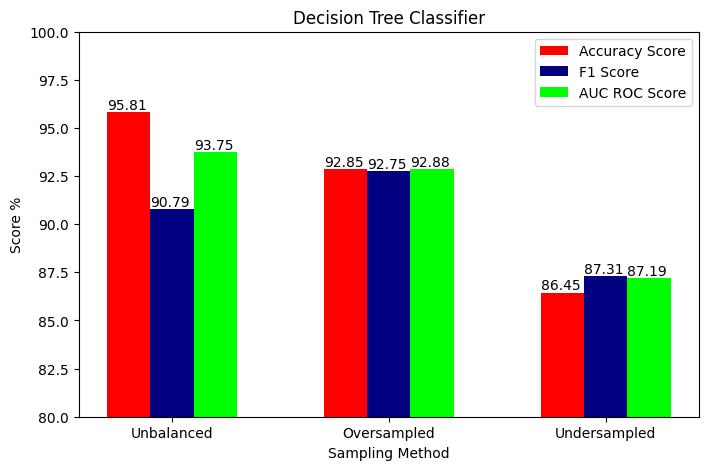

In [130]:
#Plotting a bar graph to compare the accuracy scores of the different scoring metrics
all_accuracy_scores = [mean_Dtree_accuracy_score, mean_ovr_Dtree_accuracy_score, mean_und_Dtree_accuracy_score]
all_f1_scores = [mean_Dtree_f1_score, mean_ovr_Dtree_f1_score, mean_und_Dtree_f1_score]
all_auc_roc_scores = [mean_Dtree_auc_roc_score, mean_ovr_Dtree_auc_roc_score, mean_und_Dtree_auc_roc_score]
x_labels = ['Unbalanced', 'Oversampled', 'Undersampled']

def autolabel(rectangle_group):
    for rect in rectangle_group:
        height = rect.get_height()

        ax.annotate(str(height), xy = (rect.get_x(), height+.15))

width = 0.2

x_all_accuracy_score = [x-width for x in range (len(all_accuracy_scores))]
x_all_f1_score = [x for x in range (len(all_f1_scores))]
x_all_auc_roc_score = [x+width for x in range (len(all_auc_roc_scores))]

fig,ax = plt.subplots(figsize = (8, 5))
rect1 = ax.bar(x_all_accuracy_score ,all_accuracy_scores, width, label='Accuracy Score', color = 'red')
rect2 = ax.bar(x_all_f1_score, all_f1_scores, width, label='F1 Score', color='navy')
rect3 = ax.bar(x_all_auc_roc_score, all_auc_roc_scores, width, label='AUC ROC Score', color='lime')
plt.xticks([x for x in range(len(x_labels))], x_labels)
ax.set_title('Decision Tree Classifier')
ax.set_xlabel('Sampling Method')
ax.set_ylabel('Score %')
plt.ylim([80, 100])
ax.legend()

autolabel(rect1)
autolabel(rect2)
autolabel(rect3)
plt.show()

In [ ]:
from interpret.glassbox import ExplainableBoostingClassifier
from statistics import mean
Dtree_accuracy_scores = []
Dtree_f1_scores = []

for train_index, test_index in skf.split(x_train_sm, y_train_sm):
    x_train, x_test, y_train, y_test = x_train_sm.iloc[train_index], x_train_sm.iloc[test_index], y_train_sm.iloc[train_index], y_train_sm.iloc[test_index]
    Dtree_accuracy_scores.append(get_accuracy_score(ExplainableBoostingClassifier(random_state = 5), x_train, x_test, y_train, y_test))
    Dtree_f1_scores.append(get_f1_score(ExplainableBoostingClassifier(random_state = 5), x_train, x_test, y_train, y_test))

print('Accuracy Score:',mean(Dtree_accuracy_scores))
print('F1 Score:', mean(Dtree_f1_scores))

In [10]:
from sklearn.metrics import f1_score, accuracy_score

def get_accuracy_score(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    y_pred= model.predict(x_test)
    modelAccuracyTest = accuracy_score(y_pred,y_test)
    return modelAccuracyTest

def get_f1_score(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    y_pred= model.predict(x_test)
    modelF1Test = f1_score(y_pred,y_test)
    return modelF1Test

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y , random_state=104,train_size=0.8, shuffle=True)

In [ ]:
from imblearn.over_sampling import SMOTE
import numpy as np
#Seeing the value count before oversampling
unique, count = np.unique(y_train, return_counts = True)
y_train_dict_value_count = {k:v for (k,v) in zip(unique, count)}
print("Before oversampling",y_train_dict_value_count)

sm = SMOTE(random_state=12)
x_train_sm, y_train_sm = sm.fit_sample(x_train, y_train)

# Seeing the value count after oversampling
unique, count = np.unique(y_train_sm, return_counts = True)
y_train_smote_value_count = {k:v for (k,v) in zip(unique, count)}
print("After oversampling",y_train_smote_value_count)

In [17]:
from interpret.glassbox import ExplainableBoostingClassifier
ebm = ExplainableBoostingClassifier(random_state=5)
ebm.fit(x_train_sm, y_train_sm)
y_pred = ebm.predict(x_test)
print('Accuracy Score:', accuracy_score(y_pred,y_test))
print('F1 Score:', f1_score(y_pred,y_test))


Accuracy Score: 0.5085046745242779
F1 Score: 0.3274009482286232


In [18]:
from interpret import show
ebm_global = ebm.explain_global(name='EBM')
show(ebm_global)

<!-- http://127.0.0.1:7001/2134741639008/ -->

<AxesSubplot: xlabel='label', ylabel='count'>

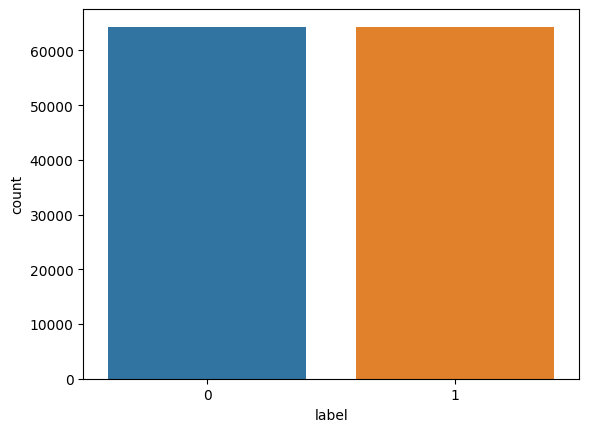

In [19]:
target = 'label'

import numpy as np
minority_class_len = len(mBusData[mBusData[target] == 1])
majority_class_indices = mBusData[mBusData[target] == 0].index

random_majority_indices = np.random.choice(majority_class_indices, minority_class_len, replace=False)

minority_class_indices = mBusData[mBusData[target] == 1].index

under_sample_indices = np.concatenate([minority_class_indices, random_majority_indices])

under_sample = mBusData.loc[under_sample_indices]

import seaborn as sns
sns.countplot(x = target, data = under_sample)

In [ ]:
und_x = under_sample.loc[:, mBusData.columns !=target]
und_y = under_sample.loc[:, mBusData.columns == target]

from sklearn.tree import DecisionTreeClassifier
from statistics import mean
Dtree_accuracy_scores = []
Dtree_f1_scores = []

for train_index, test_index in skf.split(und_x, und_y):
    x_train, x_test, y_train, y_test = und_x.iloc[train_index], und_x.iloc[test_index], und_y.iloc[train_index], und_y.iloc[test_index]
    Dtree_accuracy_scores.append(get_accuracy_score(DecisionTreeClassifier(), x_train, x_test, y_train, y_test))
    Dtree_f1_scores.append(get_f1_score(DecisionTreeClassifier(), x_train, x_test, y_train, y_test))

print('Accuracy Score:',mean(Dtree_accuracy_scores))
print('F1 Score:', mean(Dtree_f1_scores))

In [21]:
from interpret.glassbox import ExplainableBoostingClassifier
und_x = under_sample.loc[:, mBusData.columns !=target]
und_y = under_sample.loc[:, mBusData.columns == target]
ebm = ExplainableBoostingClassifier(random_state=5)
ebm.fit(und_x, und_y)
y_pred = ebm.predict(x_test)
print('Accuracy Score:', accuracy_score(y_pred,y_test))
print('F1 Score:', f1_score(y_pred,y_test))

Accuracy Score: 0.5192465049879003
F1 Score: 0.33585069026889225


In [22]:
from interpret import show
ebm_global = ebm.explain_global(name='EBM')
show(ebm_global)

<!-- http://127.0.0.1:7001/2134649081424/ -->